In [29]:
# Problem 1:

import numpy as np
import pandas as pd
import math

X_test = pd.read_csv('/Users/earthaguo/Documents/Machine Learning Homework/HW3/data/gaussian_process/X_test.csv',header=None)
X_train = pd.read_csv('/Users/earthaguo/Documents/Machine Learning Homework/HW3/data/gaussian_process/X_train.csv',header=None)
Y_test =  pd.read_csv('/Users/earthaguo/Documents/Machine Learning Homework/HW3/data/gaussian_process/y_test.csv',header=None)
Y_train = pd.read_csv('/Users/earthaguo/Documents/Machine Learning Homework/HW3/data/gaussian_process/y_train.csv',header=None)



In [30]:
X_train_matrix = np.matrix(X_train)
X_train_matrix

matrix([[ 0.30957 , -0.36707 ,  0.45545 , ..., -0.73992 , -0.80885 ,  1.      ],
        [ 0.30957 ,  0.3592  , -0.11611 , ...,  0.16625 , -0.80885 ,  1.      ],
        [-0.86291 , -0.99778 , -0.89551 , ..., -0.55868 , -0.26592 ,  1.      ],
        ..., 
        [ 0.30957 ,  0.53121 , -0.84355 , ...,  1.9786  , -0.26592 ,  1.      ],
        [ 0.30957 , -0.30018 ,  0.74123 , ...,  0.093761,  0.54847 ,  1.      ],
        [ 1.4821  ,  1.0281  ,  0.63731 , ..., -0.77616 ,  0.81993 ,  1.      ]])

In [31]:
X_train_matrix[1]

matrix([[ 0.30957 ,  0.3592  , -0.11611 , -0.038361,  0.16625 , -0.80885 ,
          1.      ]])

In [32]:
X_test_matrix = np.matrix(X_test)
X_test_matrix.shape

(42, 7)

In [33]:
Y_train_matrix = np.matrix(Y_train)
Y_train_matrix.shape

(350, 1)

In [34]:
Y_test_matrix = np.matrix(Y_test)
Y_test_matrix.shape

(42, 1)

In [35]:
# Queston 1a: 

def miu_x(b, variance):
    import numpy as np
    import pandas as pd
    from numpy.linalg import inv
    
    
    Kn = np.zeros(shape=(350,350))
    Kn = np.matrix(Kn)
    for i in range(0,350):
        for j in range(0,350):
            Kn[i,j] = np.exp((-1/b)*((np.linalg.norm(X_train_matrix[i]-X_train_matrix[j]))**2))
            
    k_x_Dn = np.zeros(shape=(42,350))
    for i in range(0,42):
        for j in range(0,350):
            k_x_Dn[i,j] = np.exp((-1/b)*((np.linalg.norm(X_test_matrix[i]-X_train_matrix [j])**2)))
    k_x_Dn = np.matrix(k_x_Dn)
    
    I = np.identity(350)
    middle = inv(variance*I + Kn)
    miu = np.matmul(np.matmul(k_x_Dn, middle),Y_train_matrix)
    
    return miu



In [36]:
# Queston 1b:
    
b_list = [5,7,9,11,13,15]
variance_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

container = []
for i in range(0,6):
    for j in range(0,10):
        oh = miu_x(b_list[i], variance_list[j])
        container.append(oh)

In [37]:
container

[matrix([[ -5.10175432],
         [ -8.27668668],
         [  7.00111071],
         [ -6.07445331],
         [ -3.76971859],
         [  1.38008267],
         [ -7.12689409],
         [ -1.88194527],
         [-11.06468048],
         [ 14.28407549],
         [ -7.50951207],
         [ 14.44245924],
         [ -9.8916503 ],
         [ -3.97763993],
         [ -0.87858991],
         [ -9.60470916],
         [ -2.3066981 ],
         [ -0.61945162],
         [ 12.56690822],
         [ -5.38229882],
         [-10.28930006],
         [ 13.67613096],
         [ -3.86354399],
         [ -6.58671499],
         [ -9.83128835],
         [ -8.33437757],
         [  3.7352757 ],
         [  0.86455049],
         [ -2.83592533],
         [ -4.74292337],
         [ -8.25368057],
         [ -5.92675068],
         [  2.16456741],
         [ -4.08329852],
         [ -5.33694777],
         [  3.45156026],
         [  9.4136129 ],
         [ 11.74898801],
         [  9.65897676],
         [ -4.13303479],


In [38]:
RMSE = []
for i in range(0,60):
    rmse_value = (np.linalg.norm(container[i]-Y_test_matrix))/math.sqrt(42)
    RMSE.append(rmse_value)

In [39]:
len(RMSE)

60

In [40]:
parameter = []
for i in range(0,6):
    for j in range(0,10):
        parameter_value = (b_list[i],variance_list[j])
        parameter.append(parameter_value)



In [41]:
len(parameter)

60

In [42]:
q1b_output = []
for i in range(0,60):
    value = (parameter[i], RMSE[i])
    q1b_output.append(value)
q1b_output

[((5, 0.1), 1.9662760959106844),
 ((5, 0.2), 1.9331353431915099),
 ((5, 0.3), 1.9234202036790748),
 ((5, 0.4), 1.9221975960728812),
 ((5, 0.5), 1.9247691150911839),
 ((5, 0.6), 1.9292125465306675),
 ((5, 0.7), 1.9346340676862641),
 ((5, 0.8), 1.9405830986071162),
 ((5, 0.9), 1.9468199359536766),
 ((5, 1), 1.9532125012540666),
 ((7, 0.1), 1.9201632583203943),
 ((7, 0.2), 1.9048765173992979),
 ((7, 0.3), 1.9080803279153733),
 ((7, 0.4), 1.9159016762415595),
 ((7, 0.5), 1.924804075635046),
 ((7, 0.6), 1.9337013992174843),
 ((7, 0.7), 1.942253766849847),
 ((7, 0.8), 1.9503800376837306),
 ((7, 0.9), 1.9580930654064796),
 ((7, 1), 1.9654380386275307),
 ((9, 0.1), 1.8976487519328011),
 ((9, 0.2), 1.9025191297561446),
 ((9, 0.3), 1.9176476894439316),
 ((9, 0.4), 1.9325143304098984),
 ((9, 0.5), 1.9456994728725279),
 ((9, 0.6), 1.9572347910001082),
 ((9, 0.7), 1.9674032573030402),
 ((9, 0.8), 1.9764917493462795),
 ((9, 0.9), 1.9847407716620322),
 ((9, 1), 1.9923412110452898),
 ((11, 0.1), 1.890

In [43]:
len(q1b_output)


60

In [44]:
df = pd.DataFrame(q1b_output, columns=["(b, variance)", "RMSE"])  

In [66]:
df

,"(b, variance)",RMSE
0,"(5, 0.1)",1.966276
1,"(5, 0.2)",1.933135
2,"(5, 0.3)",1.923420
3,"(5, 0.4)",1.922198
4,"(5, 0.5)",1.924769
5,"(5, 0.6)",1.929213
6,"(5, 0.7)",1.934634
7,"(5, 0.8)",1.940583
8,"(5, 0.9)",1.946820
9,"(5, 1)",1.953213


In [67]:
# Queston 1c:
df['RMSE']

0     1.966276
1     1.933135
2     1.923420
3     1.922198
4     1.924769
5     1.929213
6     1.934634
7     1.940583
8     1.946820
9     1.953213
10    1.920163
11    1.904877
12    1.908080
13    1.915902
14    1.924804
15    1.933701
16    1.942254
17    1.950380
18    1.958093
19    1.965438
20    1.897649
21    1.902519
22    1.917648
23    1.932514
24    1.945699
25    1.957235
26    1.967403
27    1.976492
28    1.984741
29    1.992341
30    1.890507
31    1.914981
32    1.938849
33    1.957936
34    1.973216
35    1.985764
36    1.996375
37    2.005603
38    2.013835
39    2.021345
40    1.895849
41    1.935586
42    1.964597
43    1.985502
44    2.001314
45    2.013878
46    2.024310
47    2.033307
48    2.041317
49    2.048642
50    1.909603
51    1.959549
52    1.990804
53    2.011915
54    2.027370
55    2.039465
56    2.049463
57    2.058105
58    2.065845
59    2.072976
Name: RMSE, dtype: float64

In [68]:
df['RMSE'].idxmin()

30

In [69]:
# 30    1.890507
min(df['RMSE'])

1.8905071149789958

In [76]:
# 30	(11, 0.1)	1.890507

best_prediction = miu_x(11, 0.1)
best_prediction

matrix([[ -5.12843146],
        [ -9.14171058],
        [  7.65951551],
        [ -6.76022585],
        [ -3.96029705],
        [  1.49133749],
        [ -7.93679949],
        [ -1.78291771],
        [-10.93823315],
        [ 15.00255581],
        [ -7.64548411],
        [ 13.27761217],
        [-10.04086845],
        [ -4.42487808],
        [ -1.11320836],
        [-10.03283105],
        [ -3.15455104],
        [ -0.40976141],
        [ 12.77331242],
        [ -4.7237521 ],
        [-10.57219072],
        [ 14.03465965],
        [ -4.23298055],
        [ -7.59189213],
        [ -9.97666776],
        [ -8.26058952],
        [  3.77313971],
        [  0.6558537 ],
        [ -2.52954128],
        [ -4.79726062],
        [ -8.07308225],
        [ -6.13919628],
        [  2.37203754],
        [ -3.89248598],
        [ -5.27960752],
        [  4.16470665],
        [  9.58982339],
        [ 10.89549918],
        [  9.43161145],
        [ -4.39101665],
        [  2.84048427],
        [ -2.061

In [77]:
best_prediction = pd.DataFrame(best_prediction, columns=["Prediction"]) 
best_prediction 

,Prediction
0,-5.128431
1,-9.141711
2,7.659516
3,-6.760226
4,-3.960297
5,1.491337
6,-7.936799
7,-1.782918
8,-10.938233
9,15.002556


In [82]:
Y_test

,0
0,-2.94590
1,-8.44590
2,4.55410
3,-7.44590
4,-5.34590
5,2.55410
6,-7.44590
7,-2.44590
8,-10.44600
9,11.65400


In [85]:
Gaussian_process = pd.concat([best_prediction, Y_test], axis=1)

In [86]:
Gaussian_process  

,Prediction,0
0,-5.128431,-2.94590
1,-9.141711,-8.44590
2,7.659516,4.55410
3,-6.760226,-7.44590
4,-3.960297,-5.34590
5,1.491337,2.55410
6,-7.936799,-7.44590
7,-1.782918,-2.44590
8,-10.938233,-10.44600
9,15.002556,11.65400


In [87]:
Gaussian_process.columns = ['Prediction', 'Real value']
Gaussian_process

,Prediction,Real value
0,-5.128431,-2.94590
1,-9.141711,-8.44590
2,7.659516,4.55410
3,-6.760226,-7.44590
4,-3.960297,-5.34590
5,1.491337,2.55410
6,-7.936799,-7.44590
7,-1.782918,-2.44590
8,-10.938233,-10.44600
9,15.002556,11.65400


In [88]:
# Homework 1 Problem 1(d):


In [89]:
X_test_matrix

matrix([[ 0.30957  ,  0.34964  ,  0.013785 ,  0.52674  ,  0.49248  ,
          0.277    ,  1.       ],
        [ 1.4821   ,  1.4868   ,  1.5726   ,  0.84226  , -1.4649   ,
         -1.6232   ,  1.       ],
        [-0.86291  , -0.7111   , -0.66169  , -0.4151   ,  1.1087   ,
          1.6343   ,  1.       ],
        [ 0.30957  ,  0.53121  , -0.11611  ,  0.94586  ,  0.52872  ,
         -0.53739  ,  1.       ],
        [ 1.4821   ,  1.0281   ,  0.89711  ,  0.26774  , -1.5736   ,
          0.54847  ,  1.       ],
        [-0.86291  , -0.92133  , -0.37591  , -0.83892  , -0.01498  ,
         -0.80885  ,  1.       ],
        [ 1.4821   ,  1.0472   ,  1.1829   ,  0.53616  , -1.2836   ,
         -1.6232   ,  1.       ],
        [ 0.30957  ,  0.0534   , -0.50581  , -0.45983  ,  0.16625  ,
         -1.6232   ,  1.       ],
        [ 1.4821   ,  1.4868   ,  1.8324   ,  1.3214   , -0.92115  ,
         -0.80885  ,  1.       ],
        [-0.86291  , -1.0838   , -1.1553   , -1.4335   ,  0.2025   ,
    

In [90]:
X_test_weight = X_test_matrix[:,3]
X_test_weight

matrix([[ 0.52674 ],
        [ 0.84226 ],
        [-0.4151  ],
        [ 0.94586 ],
        [ 0.26774 ],
        [-0.83892 ],
        [ 0.53616 ],
        [-0.45983 ],
        [ 1.3214  ],
        [-1.4335  ],
        [ 1.3685  ],
        [-1.1686  ],
        [ 1.2943  ],
        [ 0.44198 ],
        [-0.87542 ],
        [ 2.3233  ],
        [ 0.20298 ],
        [-0.39861 ],
        [-1.0979  ],
        [ 0.2124  ],
        [ 1.75    ],
        [-1.2981  ],
        [-0.074858],
        [ 0.92231 ],
        [ 1.704   ],
        [ 0.81753 ],
        [-1.3452  ],
        [-0.82362 ],
        [-0.37389 ],
        [ 0.65624 ],
        [ 1.0271  ],
        [ 0.74336 ],
        [-0.12666 ],
        [ 1.086   ],
        [ 0.76809 ],
        [-0.28559 ],
        [-0.71531 ],
        [-0.92722 ],
        [-0.80949 ],
        [ 0.50908 ],
        [-0.96489 ],
        [ 0.51497 ]])

In [91]:
X_train_weight = X_train_matrix[:,3]
X_train_weight

matrix([[ -2.00830000e-01],
        [ -3.83610000e-02],
        [ -1.22510000e+00],
        [ -5.62260000e-01],
        [ -1.25100000e+00],
        [ -1.38640000e+00],
        [ -1.03110000e-01],
        [ -8.82480000e-01],
        [  9.70280000e-02],
        [  1.38500000e+00],
        [ -6.44670000e-01],
        [  5.26740000e-01],
        [ -9.97860000e-01],
        [  2.74800000e-01],
        [  5.43220000e-01],
        [  5.66770000e-01],
        [ -1.07440000e+00],
        [  1.63100000e+00],
        [ -9.74310000e-01],
        [ -3.24440000e-01],
        [ -7.56510000e-01],
        [ -3.62120000e-01],
        [  1.75000000e+00],
        [ -1.02380000e+00],
        [ -4.65720000e-01],
        [  3.00700000e-01],
        [ -6.39960000e-01],
        [ -7.85950000e-01],
        [  4.21960000e-01],
        [ -4.44530000e-01],
        [  2.25350000e-01],
        [ -3.26800000e-01],
        [  4.13720000e-01],
        [  1.60510000e+00],
        [ -9.68430000e-01],
        [ -4.0332000

In [92]:
X_train_matrix[0]

matrix([[ 0.30957, -0.36707,  0.45545, -0.20083, -0.73992, -0.80885,  1.     ]])

In [93]:
X_train_weight

matrix([[ -2.00830000e-01],
        [ -3.83610000e-02],
        [ -1.22510000e+00],
        [ -5.62260000e-01],
        [ -1.25100000e+00],
        [ -1.38640000e+00],
        [ -1.03110000e-01],
        [ -8.82480000e-01],
        [  9.70280000e-02],
        [  1.38500000e+00],
        [ -6.44670000e-01],
        [  5.26740000e-01],
        [ -9.97860000e-01],
        [  2.74800000e-01],
        [  5.43220000e-01],
        [  5.66770000e-01],
        [ -1.07440000e+00],
        [  1.63100000e+00],
        [ -9.74310000e-01],
        [ -3.24440000e-01],
        [ -7.56510000e-01],
        [ -3.62120000e-01],
        [  1.75000000e+00],
        [ -1.02380000e+00],
        [ -4.65720000e-01],
        [  3.00700000e-01],
        [ -6.39960000e-01],
        [ -7.85950000e-01],
        [  4.21960000e-01],
        [ -4.44530000e-01],
        [  2.25350000e-01],
        [ -3.26800000e-01],
        [  4.13720000e-01],
        [  1.60510000e+00],
        [ -9.68430000e-01],
        [ -4.0332000

In [94]:
X_test_weight

matrix([[ 0.52674 ],
        [ 0.84226 ],
        [-0.4151  ],
        [ 0.94586 ],
        [ 0.26774 ],
        [-0.83892 ],
        [ 0.53616 ],
        [-0.45983 ],
        [ 1.3214  ],
        [-1.4335  ],
        [ 1.3685  ],
        [-1.1686  ],
        [ 1.2943  ],
        [ 0.44198 ],
        [-0.87542 ],
        [ 2.3233  ],
        [ 0.20298 ],
        [-0.39861 ],
        [-1.0979  ],
        [ 0.2124  ],
        [ 1.75    ],
        [-1.2981  ],
        [-0.074858],
        [ 0.92231 ],
        [ 1.704   ],
        [ 0.81753 ],
        [-1.3452  ],
        [-0.82362 ],
        [-0.37389 ],
        [ 0.65624 ],
        [ 1.0271  ],
        [ 0.74336 ],
        [-0.12666 ],
        [ 1.086   ],
        [ 0.76809 ],
        [-0.28559 ],
        [-0.71531 ],
        [-0.92722 ],
        [-0.80949 ],
        [ 0.50908 ],
        [-0.96489 ],
        [ 0.51497 ]])

In [102]:
def miu_x_4th_dimension(b, variance):
    import numpy as np
    import pandas as pd
    from numpy.linalg import inv
    
    Kn = np.zeros(shape=(350,350))
    Kn = np.matrix(Kn)
    for i in range(0,350):
        for j in range(0,350):
            Kn[i,j] = np.exp((-1/b)*((X_train_weight[i,0]-X_train_weight[j,0])**2))
            
    k_x_Dn = np.zeros(shape=(350,350))
    for i in range(0,350):
        for j in range(0,350):
            k_x_Dn[i,j] = np.exp((-1/b)*((X_train_weight[i,0]-X_train_weight[j,0])**2))
    k_x_Dn = np.matrix(k_x_Dn)
    
    I = np.identity(350)
    middle = inv(variance*I + Kn) 
    miu = np.matmul(np.matmul(k_x_Dn, middle),Y_train_matrix)
    
    return miu



In [104]:
gaussian_y = miu_x_4th_dimension(5, 2)
gaussian_y.shape

(350, 1)

In [105]:
df_X_train_weight = pd.DataFrame(X_train_weight, columns=["X_train_weight"]) 
df_gaussian_y = pd.DataFrame(gaussian_y, columns=["Gaussian Y"]) 
solid_line = pd.concat([df_X_train_weight, df_gaussian_y ], axis=1)
solid_line


,X_train_weight,Gaussian Y
0,-0.200830,0.640589
1,-0.038361,-0.693338
2,-1.225100,8.529680
3,-0.562260,3.667161
4,-1.251000,8.680518
5,-1.386400,9.403705
6,-0.103110,-0.166574
7,-0.882480,6.213808
8,0.097028,-1.767147
9,1.385000,-8.766701


In [106]:
sorted_solid_line = solid_line.sort_values('X_train_weight')
sorted_solid_line 

,X_train_weight,Gaussian Y
62,-1.6065,10.324764
139,-1.5641,10.173165
134,-1.4393,9.654860
259,-1.4182,9.556873
180,-1.3923,9.432617
205,-1.3923,9.432617
5,-1.3864,9.403705
192,-1.3864,9.403705
148,-1.3569,9.255807
88,-1.3569,9.255807


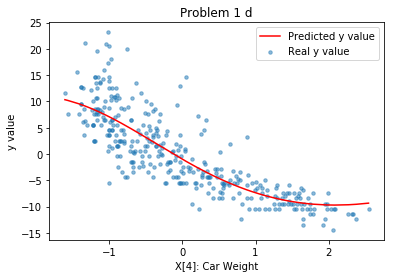

In [110]:
import matplotlib.pyplot as plt
# Plot
plt.scatter(X_train_weight, Y_train_matrix,alpha=0.5, s = 12,label='Real y value')
plt.title('Problem 1 d')
plt.xlabel('X[4]: Car Weight')
plt.ylabel('y value')

plt.plot(sorted_solid_line['X_train_weight'], sorted_solid_line['Gaussian Y'],color = 'red',label='Predicted y value')

plt.legend()

plt.show()